In [1]:
import glob
from astropy.io import ascii, fits
from subprocess import check_output
import matplotlib as mpl
import pylab
import numpy
%matplotlib inline

Take statistics by Stuart's imstat.py first. `files` is a list of fits files which will be analyzed.

In [2]:
files = glob.glob("/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20200629/ogP3/n*/sflat_flat_500_H*/*_R22_S00.fits")

results = {}
for afile in files:
    fh = fits.open(afile)
    ogp = fh["REB_COND"].header["OGP"]
    astat = check_output("/gpfs/slac/lsst/fs2/u1/devel/marshall/mutils/bin/imstat.py --quick {}".format(afile),shell=True)
    table = ascii.read(str(astat).split("\\n")[2:])
    results.update(
        {
            afile: {
            "ogp"    : ogp,
            "header" : fh["REB_COND"].header,
            "stat"   : table
            }
        }
    )

One example of output.

In [3]:
results[files[0]]["stat"]

id,HDUname,median,bias,signal,noise,adu/sec,s-cte,p-cte
int64,str9,int64,int64,int64,float64,float64,float64,float64
1,Segment10,60770,24509,36261,12.19,1415.63,0.999997,1.0
2,Segment11,58504,22078,36426,14.34,1422.07,0.999997,1.0
3,Segment12,57340,21142,36198,15.96,1413.17,0.999997,1.0
4,Segment13,56887,20369,36518,16.94,1425.66,0.999997,1.0
5,Segment14,56750,20406,36344,16.73,1418.87,0.999997,1.0
6,Segment15,58325,21867,36458,15.27,1423.32,0.999997,1.0
7,Segment16,61012,24448,36564,12.62,1427.46,0.999997,1.0
8,Segment17,64264,27060,37204,9.148,1452.44,0.999993,1.0
9,Segment07,55094,30531,24563,12.68,958.94,0.999984,1.0


Then, let's plot all results in a plot. First, we'll see s-CTE with different OGs.

Text(0, 0.5, 's-cte')

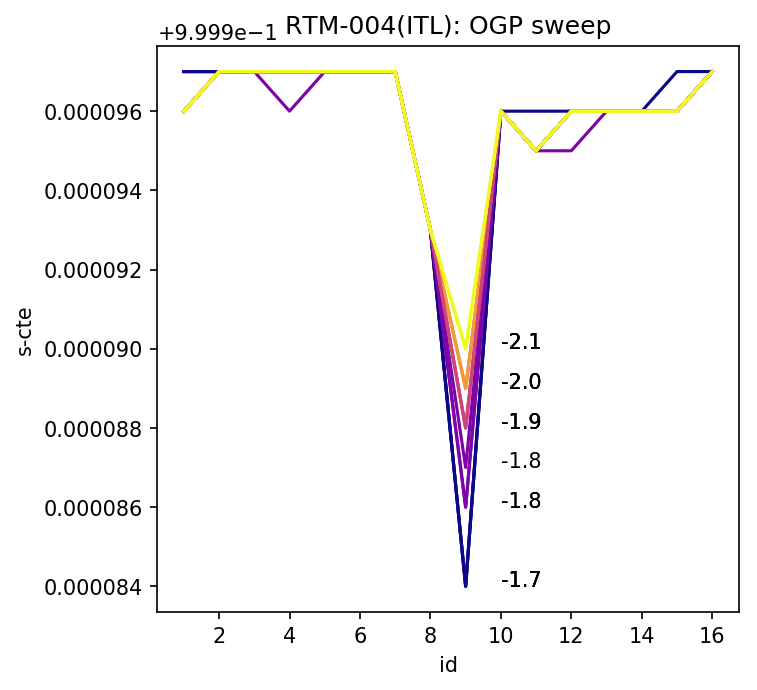

In [4]:
pylab.subplots(1,1,figsize=(5,5),dpi=150)
for afile in results:
    aresult = results[afile]
    x=aresult["stat"]["id"]
    y=aresult["stat"]["s-cte"]
    ogp = aresult["ogp"]
    pylab.plot(x,y,label=ogp,color=mpl.cm.plasma(-(ogp+1.7)/0.4))
    mnid = numpy.argmin(y)
    pylab.annotate(ogp,(x[mnid]+1,y[mnid]))
pylab.title("RTM-004(ITL): OGP sweep")
pylab.xlabel("id")
pylab.ylabel("s-cte")

Only one segment #9 is sensitive to a change in OG. As we go lower OG value, sCTE will be better. The flat used here is high flux (30k ADU).

The next plot explores how noise measurement behaves as a change in OG.

Text(0, 0.5, 'noise')

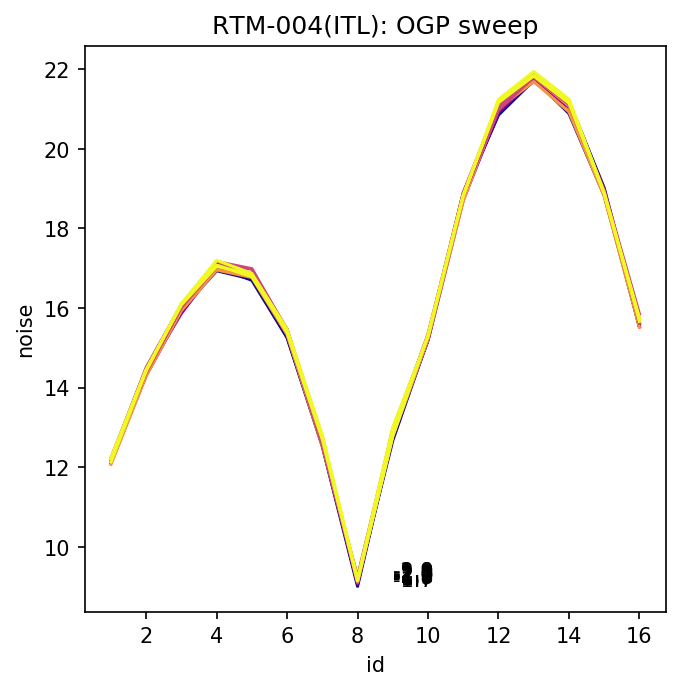

In [5]:
pylab.subplots(1,1,figsize=(5,5),dpi=150)
for afile in results:
    aresult = results[afile]
    x=aresult["stat"]["id"]
    y=aresult["stat"]["noise"]
    ogp = aresult["ogp"]
    pylab.plot(x,y,label=ogp,color=mpl.cm.plasma(-(ogp+1.7)/0.4))
    mnid = numpy.argmin(y)
    pylab.annotate(ogp,(x[mnid]+1,y[mnid]))
pylab.title("RTM-004(ITL): OGP sweep")
pylab.xlabel("id")
pylab.ylabel("noise")

No clear visible change can be seen.

Next we'll explore the case for low flux.

In [6]:
files = glob.glob("/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20200629/ogP3/n*/sflat_flat_500_L*/*_R22_S00.fits")

results = {}
for afile in files:
    fh = fits.open(afile)
    ogp = fh["REB_COND"].header["OGP"]
    astat = check_output("/gpfs/slac/lsst/fs2/u1/devel/marshall/mutils/bin/imstat.py --quick {}".format(afile),shell=True)
    table = ascii.read(str(astat).split("\\n")[2:])
    results.update(
        {
            afile: {
            "ogp"    : ogp,
            "header" : fh["REB_COND"].header,
            "stat"   : table
            }
        }
    )

Text(0, 0.5, 's-cte')

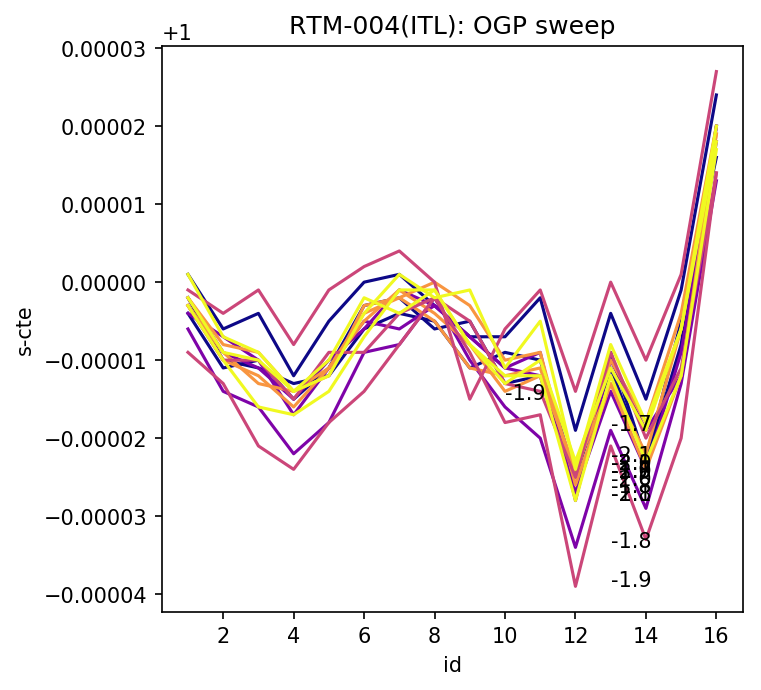

In [7]:
pylab.subplots(1,1,figsize=(5,5),dpi=150)
for afile in results:
    aresult = results[afile]
    x=aresult["stat"]["id"]
    y=aresult["stat"]["s-cte"]
    ogp = aresult["ogp"]
    pylab.plot(x,y,label=ogp,color=mpl.cm.plasma(-(ogp+1.7)/0.4))
    mnid = numpy.argmin(y)
    pylab.annotate(ogp,(x[mnid]+1,y[mnid]))
pylab.title("RTM-004(ITL): OGP sweep")
pylab.xlabel("id")
pylab.ylabel("s-cte")

Text(0, 0.5, 'noise')

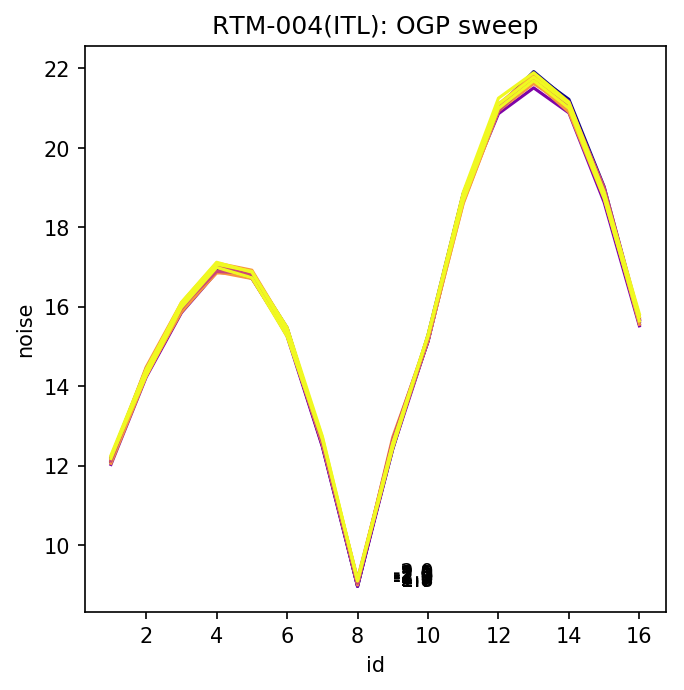

In [8]:
pylab.subplots(1,1,figsize=(5,5),dpi=150)
for afile in results:
    aresult = results[afile]
    x=aresult["stat"]["id"]
    y=aresult["stat"]["noise"]
    ogp = aresult["ogp"]
    pylab.plot(x,y,label=ogp,color=mpl.cm.plasma(-(ogp+1.7)/0.4))
    mnid = numpy.argmin(y)
    pylab.annotate(ogp,(x[mnid]+1,y[mnid]))
pylab.title("RTM-004(ITL): OGP sweep")
pylab.xlabel("id")
pylab.ylabel("noise")